<a href="https://colab.research.google.com/github/Nourin-Nusrat/Computer_Graphics/blob/main/Graphics_LAB_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Bresenham Line Drawing Algorithm

Midpoint Circle Drawing Algorithm

Sutherland-Hodgman Polygon Clipping

Cohen-Sutherland Line Clipping Algorithm

Bézier Curve Drawing

Koch Snowflake Fractal Generation

2D Translation of a Polygon

2D Scaling of a Polygon (Fixed Point)

2D Rotation of a Polygon (Pivot Point)

# 1. line drawing using Brasenham Algorithm

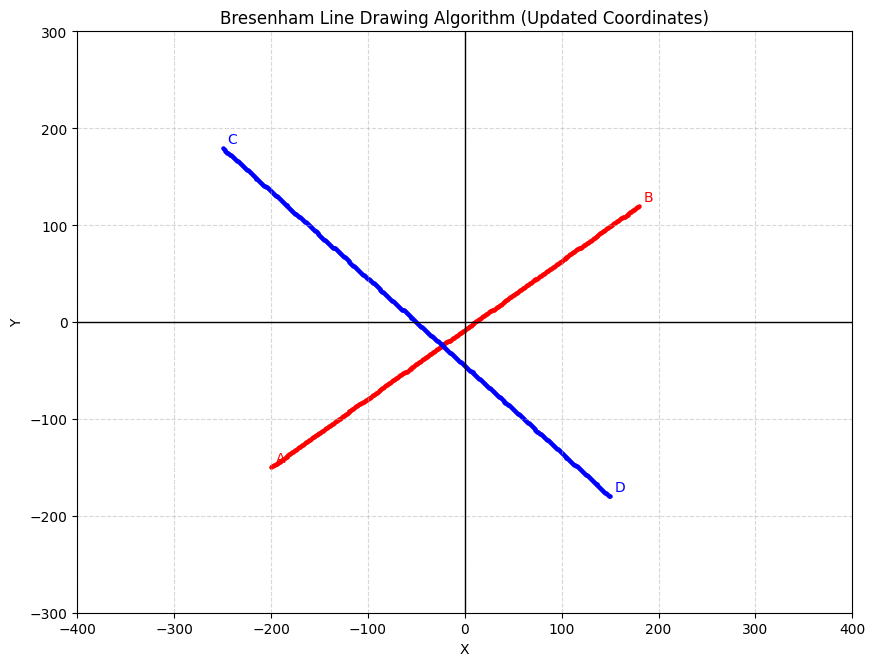

In [36]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def bresenham_line(p1: Point, p2: Point):
    points = []
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x2 >= x1 else -1
    sy = 1 if y2 >= y1 else -1

    x, y = x1, y1

    if dy <= dx:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            points.append((x, y))
            x += sx
            if p < 0:
                p += 2 * dy
            else:
                y += sy
                p += 2 * dy - 2 * dx
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            points.append((x, y))
            y += sy
            if p < 0:
                p += 2 * dx
            else:
                x += sx
                p += 2 * dx - 2 * dy
    return points

def draw_axes(ax, width, height):
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlim(-width//2, width//2)
    ax.set_ylim(-height//2, height//2)
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True, linestyle='--', alpha=0.5)

# Set up plot
WIDTH, HEIGHT = 800, 600
fig, ax = plt.subplots(figsize=(10, 8))
draw_axes(ax, WIDTH, HEIGHT)

# Updated coordinates
A = Point(-200, -150)
B = Point(180, 120)
C = Point(-250, 180)
D = Point(150, -180)

lines = [
    (A, B, "red", "A", "B"),
    (C, D, "blue", "C", "D")
]

# Draw lines
for p1, p2, color, name1, name2 in lines:
    pts = bresenham_line(p1, p2)
    xs, ys = zip(*pts)
    ax.scatter(xs, ys, color=color, s=5)
    ax.text(p1.x + 5, p1.y + 5, name1, fontsize=10, color=color)
    ax.text(p2.x + 5, p2.y + 5, name2, fontsize=10, color=color)

plt.title("Bresenham Line Drawing Algorithm (Updated Coordinates)")
plt.show()


# 2. Circle using the Midpoint Circle Algorithm.

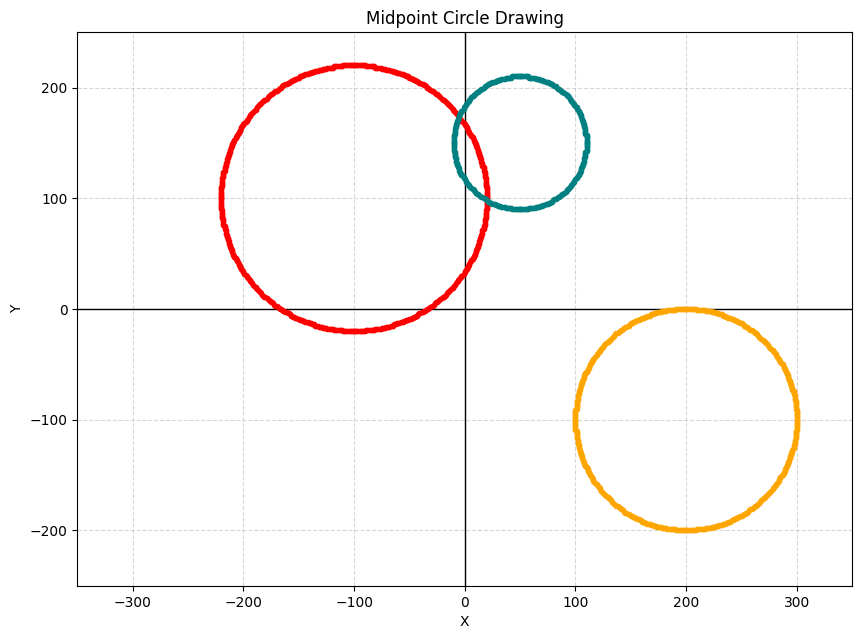

In [38]:
import matplotlib.pyplot as plt

def plot_circle_points(xc, yc, x, y, color, ax):
    points = [
        (xc + x, yc + y),
        (xc + y, yc + x),
        (xc - y, yc + x),
        (xc - x, yc + y),
        (xc - x, yc - y),
        (xc - y, yc - x),
        (xc + y, yc - x),
        (xc + x, yc - y),
    ]
    for px, py in points:
        ax.plot(px, py, marker='o', color=color, markersize=3)

def midpoint_circle(xc, yc, r, color, ax):
    x = 0
    y = r
    p = 1 - r

    plot_circle_points(xc, yc, x, y, color, ax)

    while x < y:
        x += 1
        if p < 0:
            p += 2 * x + 1
        else:
            y -= 1
            p += 2 * (x - y) + 1
        plot_circle_points(xc, yc, x, y, color, ax)

def draw_axes(ax, width, height):
    """Draw X and Y axes"""
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlim(-width//2, width//2)
    ax.set_ylim(-height//2, height//2)
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True, linestyle='--', alpha=0.5)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))
draw_axes(ax, 700, 500)

# Draw multiple circles
midpoint_circle(-100, 100, 120, 'red', ax)
midpoint_circle(200, -100, 100, 'orange', ax)
midpoint_circle(50, 150, 60, 'teal', ax)

plt.title("Midpoint Circle Drawing")
plt.show()


# 3. Cohen-Sutherland Line Clipping

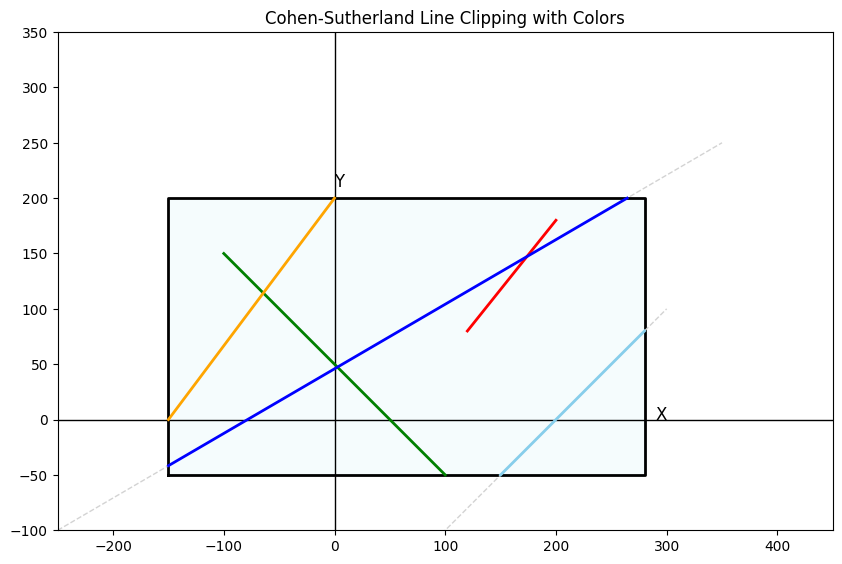

In [40]:
import matplotlib.pyplot as plt

# Clipping window boundaries
x_left, x_right = -150, 280
y_bottom, y_top = -50, 200

# Region codes
LEFT, RIGHT, BOTTOM, TOP = 1, 2, 4, 8

def region_code(x, y):
    code = 0
    if x < x_left:
        code |= LEFT
    elif x > x_right:
        code |= RIGHT
    if y < y_bottom:
        code |= BOTTOM
    elif y > y_top:
        code |= TOP
    return code

def cohen_sutherland(x1, y1, x2, y2):
    code1 = region_code(x1, y1)
    code2 = region_code(x2, y2)

    while True:
        if not (code1 | code2):
            return [(x1, y1), (x2, y2)]
        elif code1 & code2:
            return None
        else:
            if code1:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (y_top - y1) / (y2 - y1)
                y = y_top
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (y_bottom - y1) / (y2 - y1)
                y = y_bottom
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (x_right - x1) / (x2 - x1)
                x = x_right
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (x_left - x1) / (x2 - x1)
                x = x_left

            if code_out == code1:
                x1, y1 = x, y
                code1 = region_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = region_code(x2, y2)

# Plotting
fig, ax = plt.subplots(figsize=(10,7))

# Draw axes
ax.axhline(0, color="black", linewidth=1)
ax.axvline(0, color="black", linewidth=1)
ax.text(x_right+10, 0, "X", fontsize=12)
ax.text(0, y_top+10, "Y", fontsize=12)

# Draw clipping rectangle
rect_x = [x_left, x_right, x_right, x_left, x_left]
rect_y = [y_bottom, y_bottom, y_top, y_top, y_bottom]
ax.fill(rect_x, rect_y, color="#e0f7fa", alpha=0.3)  # light cyan fill
ax.plot(rect_x, rect_y, color="black", linewidth=2)

# Lines to clip
lines = [
    (120, 80, 200, 180),
    (-100, 150, 100, -50),
    (-250, -100, 350, 250),
    (-150, 0, 0, 200),
    (50, -150, 300, 100)
]

colors = ["red", "green", "blue", "orange", "skyblue"]

for i, (x1, y1, x2, y2) in enumerate(lines):
    # Original line in light gray
    ax.plot([x1, x2], [y1, y2], color="lightgray", linestyle="--", linewidth=1)

    # Clipped line in color
    clipped = cohen_sutherland(x1, y1, x2, y2)
    if clipped:
        (cx1, cy1), (cx2, cy2) = clipped
        ax.plot([cx1, cx2], [cy1, cy2], color=colors[i % len(colors)], linewidth=2)

ax.set_xlim(-250, 450)
ax.set_ylim(-100, 350)
ax.set_aspect("equal")
plt.title("Cohen-Sutherland Line Clipping")
plt.show()


# 4. Sutherland-Hodgman Polygon Clipping

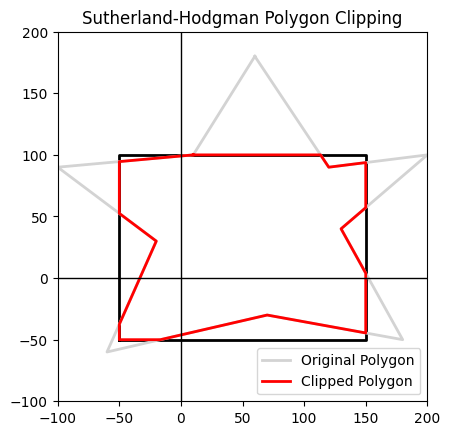

In [41]:
import matplotlib.pyplot as plt

# Point class
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Clipping window boundaries
wMin = Point(-50, -50)
wMax = Point(150, 100)

# Edges
LEFT, RIGHT, BOTTOM, TOP = 0, 1, 2, 3

# Check if point is inside edge
def inside(p, edge):
    if edge == LEFT:
        return p.x >= wMin.x
    elif edge == RIGHT:
        return p.x <= wMax.x
    elif edge == BOTTOM:
        return p.y >= wMin.y
    elif edge == TOP:
        return p.y <= wMax.y

# Find intersection of a polygon edge with a clipping edge
def intersect(p1, p2, edge):
    if p1.x != p2.x:
        m = (p2.y - p1.y) / (p2.x - p1.x)
    else:
        m = float('inf')

    if edge == LEFT:
        x = wMin.x
        y = p1.y + (wMin.x - p1.x) * m
    elif edge == RIGHT:
        x = wMax.x
        y = p1.y + (wMax.x - p1.x) * m
    elif edge == BOTTOM:
        y = wMin.y
        x = p1.x + (wMin.y - p1.y) / m if m != 0 else p1.x
    elif edge == TOP:
        y = wMax.y
        x = p1.x + (wMax.y - p1.y) / m if m != 0 else p1.x
    return Point(x, y)

# Clip polygon against one edge
def clip_polygon(points, edge):
    clipped = []
    for i in range(len(points)):
        curr = points[i]
        prev = points[i - 1]
        curr_in = inside(curr, edge)
        prev_in = inside(prev, edge)

        if prev_in and curr_in:
            clipped.append(curr)
        elif not prev_in and curr_in:
            clipped.append(intersect(prev, curr, edge))
            clipped.append(curr)
        elif prev_in and not curr_in:
            clipped.append(intersect(prev, curr, edge))
    return clipped

# Draw polygon with matplotlib
def draw_polygon(points, color, label=None):
    if not points:
        return
    x = [p.x for p in points] + [points[0].x]
    y = [p.y for p in points] + [points[0].y]
    plt.plot(x, y, color=color, linewidth=2, label=label)

# Draw clipping rectangle
def draw_clip_window():
    x = [wMin.x, wMax.x, wMax.x, wMin.x, wMin.x]
    y = [wMin.y, wMin.y, wMax.y, wMax.y, wMin.y]
    plt.plot(x, y, color='black', linewidth=2)

# Star-shaped polygon
star_points = [
    Point(60, 180), Point(120, 90), Point(200, 100),
    Point(130, 40), Point(180, -50), Point(70, -30),
    Point(-60, -60), Point(-20, 30), Point(-100, 90),
    Point(10, 100)
]

# Draw original polygon and clipping window
draw_clip_window()
draw_polygon(star_points, 'lightgray', 'Original Polygon')

# Clip polygon against all edges
clipped = star_points
for edge in [LEFT, RIGHT, BOTTOM, TOP]:
    clipped = clip_polygon(clipped, edge)

# Draw clipped polygon
draw_polygon(clipped, 'red', 'Clipped Polygon')

# Axes and settings
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-100, 200)
plt.ylim(-100, 200)
plt.legend()
plt.title("Sutherland-Hodgman Polygon Clipping")
plt.show()


# 5. brezier Curve

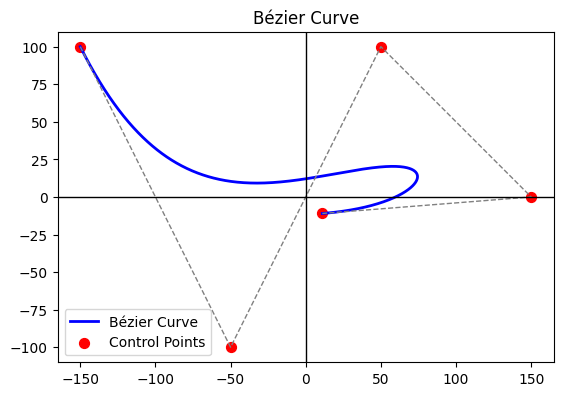

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb  # for nCr

def bezier_point(points, u):
    n = len(points) - 1
    x = sum(comb(n, k) * (u ** k) * ((1 - u) ** (n - k)) * points[k][0] for k in range(n + 1))
    y = sum(comb(n, k) * (u ** k) * ((1 - u) ** (n - k)) * points[k][1] for k in range(n + 1))
    return x, y

def draw_bezier_curve(points):
    u_vals = np.linspace(0, 1, 1000)
    curve = np.array([bezier_point(points, u) for u in u_vals])
    curve_x, curve_y = curve[:,0], curve[:,1]

    # Plot curve
    plt.plot(curve_x, curve_y, color='blue', linewidth=2, label="Bézier Curve")

    # Plot control points
    cx, cy = zip(*points)
    plt.scatter(cx, cy, color='red', s=50, label="Control Points")
    plt.plot(cx, cy, color='gray', linestyle='--', linewidth=1)

    # Axes
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.title("Bézier Curve")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

control_points = [(-150,100), (-50,-100), (50,100), (150,0), (11, -11)]
draw_bezier_curve(control_points)


# 6. Koch Snowflake

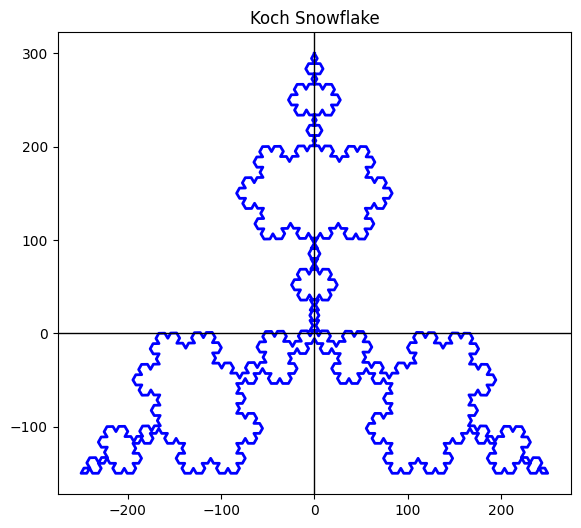

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def koch_curve(p1, p5, iterations):
    if iterations == 0:
        return [p1, p5]

    x0, y0 = p1
    x4, y4 = p5
    dx = (x4 - x0) / 3
    dy = (y4 - y0) / 3

    x1, y1 = x0 + dx, y0 + dy
    x3, y3 = x0 + 2*dx, y0 + 2*dy

    # peak of equilateral triangle
    x2 = (x0 + x4)/2 - (np.sqrt(3)/6)*(y4 - y0)
    y2 = (y0 + y4)/2 + (np.sqrt(3)/6)*(x4 - x0)

    # Recursively divide
    part1 = koch_curve(p1, (x1, y1), iterations-1)
    part2 = koch_curve((x1, y1), (x2, y2), iterations-1)
    part3 = koch_curve((x2, y2), (x3, y3), iterations-1)
    part4 = koch_curve((x3, y3), p5, iterations-1)

    # Combine segments, avoid duplicate points
    return part1[:-1] + part2[:-1] + part3[:-1] + part4

# Initial triangle
p0 = (0, 300)
p1 = (-250, -150)
p2 = (250, -150)
iterations = 4


# Generate snowflake points
segment1 = koch_curve(p0, p1, iterations)
segment2 = koch_curve(p1, p2, iterations)[1:]
segment3 = koch_curve(p2, p0, iterations)[1:]
snowflake = segment1 + segment2 + segment3

# Plot
x, y = zip(*snowflake)
plt.figure(figsize=(8,6))
plt.plot(x, y, color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Koch Snowflake")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# 7. Rotation

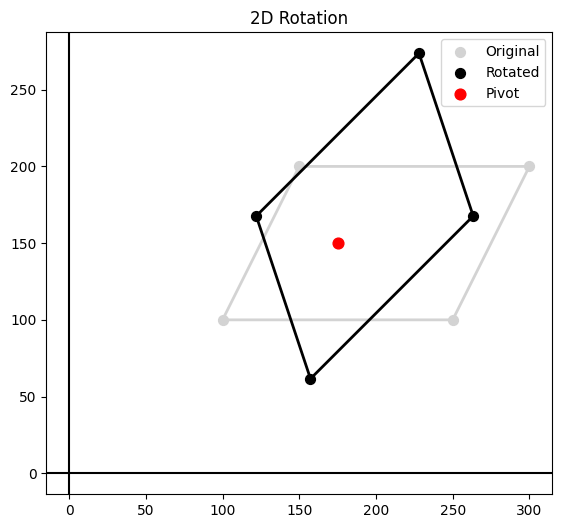

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def rotate_polygon(points, angle_deg, pivot):
    angle_rad = np.radians(angle_deg)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    rotated = []
    for x, y in points:
        x_shifted = x - pivot[0]
        y_shifted = y - pivot[1]
        x_rot = x_shifted * cos_a - y_shifted * sin_a + pivot[0]
        y_rot = x_shifted * sin_a + y_shifted * cos_a + pivot[1]
        rotated.append((x_rot, y_rot))
    return rotated

def draw_polygon(ax, points, color, label=None):
    poly = np.array(points + [points[0]])
    ax.plot(poly[:,0], poly[:,1], color=color, linewidth=2)
    if label:
        ax.scatter(*zip(*points), color=color, s=50, label=label)

# Original polygon and pivot
original = [
    (100, 100),   # bottom-left
    (250, 100),   # bottom-right
    (300, 200),   # top-right
    (150, 200)    # top-left
]

# Pivot point for rotation (can be the centroid or any point)
pivot = (175, 150)

# Rotation angle
angle = 45
rotated = rotate_polygon(original, angle, pivot)

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_aspect('equal')
draw_polygon(ax, original, 'lightgray', 'Original')
draw_polygon(ax, rotated, 'black', 'Rotated')
ax.scatter(*pivot, color='red', s=60, label='Pivot')
ax.legend()
ax.set_title('2D Rotation')
plt.show()


# 8. 2D Fixed-Point Scaling

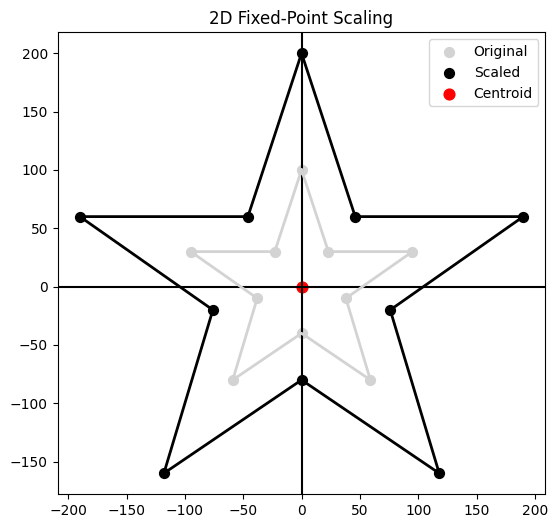

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def scale_polygon(points, sx, sy, fixed_point):
    xf, yf = fixed_point
    scaled = []
    for x, y in points:
        x_new = xf + (x - xf) * sx
        y_new = yf + (y - yf) * sy
        scaled.append((x_new, y_new))
    return scaled

def draw_polygon(ax, points, color, label=None):
    poly = np.array(points + [points[0]])
    ax.plot(poly[:,0], poly[:,1], color=color, linewidth=2)
    if label:
        ax.scatter(*zip(*points), color=color, s=50, label=label)

# Original polygon
# original = [(200,100),(150,186),(50,186),(0,100),(50,14),(150,14)]
# Star shape coordinates
original = [
    (0, 100),    # top
    (23, 30),    # right upper
    (95, 30),    # right
    (38, -10),   # right lower
    (59, -80),   # bottom right
    (0, -40),    # bottom
    (-59, -80),  # bottom left
    (-38, -10),  # left lower
    (-95, 30),   # left
    (-23, 30)    # left upper
]

n = len(original)
centroid = (sum(x for x, y in original)/n, sum(y for x, y in original)/n)
scaled = scale_polygon(original, 2, 2, centroid)

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_aspect('equal')
draw_polygon(ax, original, 'lightgray', 'Original')
draw_polygon(ax, scaled, 'black', 'Scaled')
ax.scatter(*centroid, color='red', s=60, label='Centroid')
ax.legend()
ax.set_title('2D Fixed-Point Scaling')
plt.show()


# 9. 2D Translation

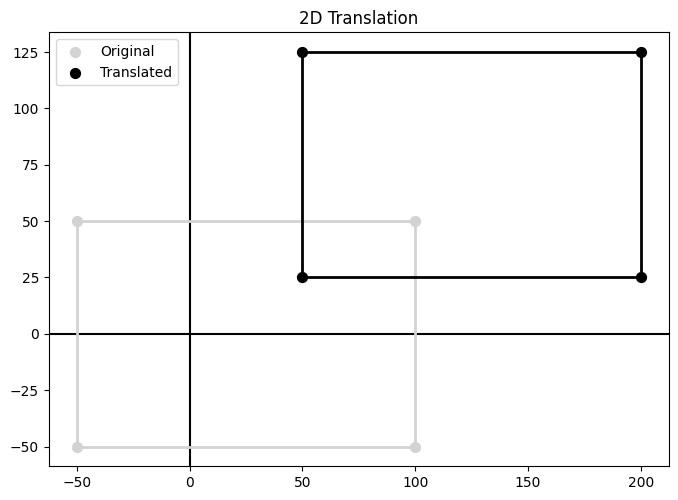

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def translate_polygon(points, tx, ty):
    return [(x + tx, y + ty) for x, y in points]

def draw_polygon(ax, points, color, label=None):
    poly = np.array(points + [points[0]])
    ax.plot(poly[:,0], poly[:,1], color=color, linewidth=2)
    if label:
        ax.scatter(*zip(*points), color=color, s=50, label=label)

# Original polygon
original = [(-50,-50),(100,-50),(100,50),(-50,50)]
translated = translate_polygon(original, 100, 75)

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_aspect('equal')
draw_polygon(ax, original, 'lightgray', 'Original')
draw_polygon(ax, translated, 'black', 'Translated')
ax.legend()
ax.set_title('2D Translation')
plt.show()
